<a href="https://colab.research.google.com/github/hxf829/keras/blob/master/6_2_rnn_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import matplotlib.pyplot as plt
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.utils import *

tf.__version__
keras.__version__

'2.4.0'

In [5]:
?Embedding

Object `Embedding` not found.


In [6]:
from tensorflow.keras.layers import SimpleRNN, Embedding
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(100))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 100)               13300     
Total params: 333,300
Trainable params: 333,300
Non-trainable params: 0
_________________________________________________________________


In [7]:
#?Embedding

In [8]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [9]:
from keras.layers import Dense
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 23s 146ms/step - loss: 0.5818 - acc: 0.6870 - val_loss: 0.4076 - val_acc: 0.8230
Epoch 2/10
157/157 [==============================] - 22s 140ms/step - loss: 0.3662 - acc: 0.8488 - val_loss: 0.3643 - val_acc: 0.8520
Epoch 3/10
157/157 [==============================] - 22s 138ms/step - loss: 0.2810 - acc: 0.8922 - val_loss: 0.3457 - val_acc: 0.8514
Epoch 4/10
157/157 [==============================] - 22s 138ms/step - loss: 0.2377 - acc: 0.9088 - val_loss: 0.6618 - val_acc: 0.7738
Epoch 5/10
157/157 [==============================] - 22s 139ms/step - loss: 0.2011 - acc: 0.9244 - val_loss: 0.3656 - val_acc: 0.8676
Epoch 6/10
157/157 [==============================] - 22s 139ms/step - loss: 0.1622 - acc: 0.9400 - val_loss: 0.3777 - val_acc: 0.8656
Epoch 7/10
157/157 [==============================] - 22s 139ms/step - loss: 0.1146 - acc: 0.9599 - val_loss: 0.5197 - val_acc: 0.7926
Epoch 8/10
157/157 [==============================] - 2

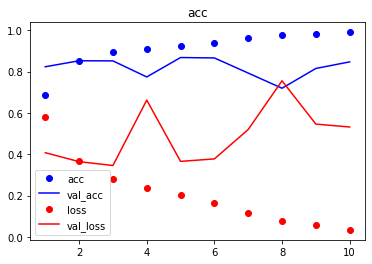

In [17]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc =  history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(acc) +1 ), acc , 'bo', label='acc')
plt.plot(range(1, len(val_acc) +1 ), val_acc , 'b', label='val_acc')
plt.plot(range(1, len(loss) +1 ), loss , 'ro', label='loss')
plt.plot(range(1, len(val_loss) +1 ), val_loss , 'r', label='val_loss')
plt.title('acc')
plt.legend()
plt.show()

In [18]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(input_train,y_train,batch_size=128,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 53s 337ms/step - loss: 0.5256 - acc: 0.7428 - val_loss: 0.3405 - val_acc: 0.8642
Epoch 2/10
157/157 [==============================] - 56s 355ms/step - loss: 0.2969 - acc: 0.8825 - val_loss: 0.2817 - val_acc: 0.8862
Epoch 3/10
157/157 [==============================] - 62s 395ms/step - loss: 0.2354 - acc: 0.9108 - val_loss: 0.2997 - val_acc: 0.8788
Epoch 4/10
157/157 [==============================] - 58s 367ms/step - loss: 0.1977 - acc: 0.9270 - val_loss: 0.2926 - val_acc: 0.8866
Epoch 5/10
157/157 [==============================] - 57s 365ms/step - loss: 0.1749 - acc: 0.9384 - val_loss: 0.3066 - val_acc: 0.8696
Epoch 6/10
157/157 [==============================] - 57s 366ms/step - loss: 0.1544 - acc: 0.9451 - val_loss: 0.3371 - val_acc: 0.8570
Epoch 7/10
157/157 [==============================] - 57s 366ms/step - loss: 0.1418 - acc: 0.9493 - val_loss: 0.4182 - val_acc: 0.8696
Epoch 8/10
157/157 [==============================] - 5

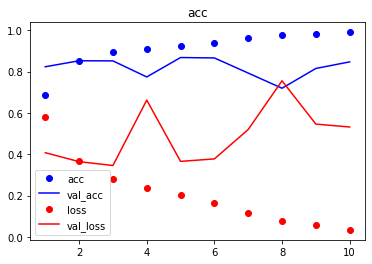

In [25]:
acc = history.history['acc']
val_acc =  history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(range(1, len(acc) +1 ), acc , 'bo', label='acc')
plt.plot(range(1, len(val_acc) +1 ), val_acc , 'b', label='val_acc')
plt.plot(range(1, len(loss) +1 ), loss , 'ro', label='loss')
plt.plot(range(1, len(val_loss) +1 ), val_loss , 'r', label='val_loss')
plt.title('acc')
plt.legend()
plt.savefig('temp.png', facecolor='0.0', edgecolor='0')
plt.show()